<a href="https://colab.research.google.com/github/Chelodromo/ast1_co18_carreras_maudet_mas/blob/main/Yahoofinace_Modelos_de_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
!pip install numpy==1.24.4


In [24]:
!pip install tensorflow numpy

  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


In [1]:
!pip install pmdarima

In [2]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

# El módulo Statsmodels

Statsmodels es un módulo de Python que ofrece clases y funciones de varios modelos estadísticos, así como pruebas de hipótesis
y análisis exploratorio de datos. La documentación se encuentra en <a href='https://www.statsmodels.org/stable/index.html'>statsmodels.org</a>.

In [3]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.graphics.tsaplots as sgt
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts

# Fuentes de datos interesantes

## API de Yahoo finance

Yahoo Finance tiene una API que permite descargar información financiera para realizar análisis. La página web original de la documentación ya no existe. Sin embargo, existen algunas páginas de documentación no oficial como <a href= 'https://github.com/mxbi/yahoo-finance-api.git'> este repositorio en GitHub, </a> o <a href='https://python-yahoofinance.readthedocs.io/en/latest/api.html'> esta página de documentación the ReadTheDocs </a>.

In [4]:
# Instalación de yfinance
%pip install yfinance

In [7]:
# Se importa la librería yfinance
import yfinance

In [8]:
stcok_1= "BDORY"
close_1="close_BDORY"
stcok_2="^BVSP"
close_2="close_BVSP"
fecha_inicial= "2023-05-01"
fecha_final = "2025-05-30"

In [9]:
# Se descargan los datos S&P500 y Nikkei225
df_yfinance_raw = yfinance.download(tickers = (stcok_1 ,stcok_2 ), #Las series de tiempo de interés -
                              start = fecha_inicial, #Fecha inicial
                              end = fecha_final, #Fecha final
                              interval = "1d", #Frecuencia.
                              group_by = 'ticker', #Criterio de agrupación. Usualmente "ticker"
                              auto_adjust = True#,
                              #threads = True
                               ) #.

[*********************100%***********************]  2 of 2 completed


In [10]:
df_yfinance_raw.head()

Ticker         ^BVSP                                               BDORY  \
Price           Open      High       Low     Close      Volume      Open   
Date                                                                       
2023-05-01       NaN       NaN       NaN       NaN         NaN  3.815094   
2023-05-02  104431.0  104447.0  101569.0  101927.0  12018000.0  3.693290   
2023-05-03  101927.0  102331.0  101433.0  101797.0  11688200.0  3.671538   
2023-05-04  101798.0  103321.0  101063.0  102174.0  14837300.0  3.654138   
2023-05-05  102175.0  105306.0  102175.0  105148.0  16699500.0  3.719390   

Ticker                                               
Price           High       Low     Close     Volume  
Date                                                 
2023-05-01  3.823794  3.641087  3.706340   295800.0  
2023-05-02  3.710690  3.619337  3.636737   468600.0  
2023-05-03  3.671538  3.597586  3.662838    84200.0  
2023-05-04  3.719390  3.623687  3.697639  2973600.0  
2023-05-05  3.841195  3.719390  3.836845   862800.0

In [11]:
# Se crea una copia para modificar
df_yfinance = df_yfinance_raw.copy()

In [12]:
# Se agregan columnas para el nivel de cierre
df_yfinance[close_1] = df_yfinance[stcok_1].Close
df_yfinance[close_2] = df_yfinance[stcok_2].Close

In [13]:
#f_comp = df_comp.iloc[1:] # Removing the first elements, since we always start 1 period before the first, due to time zone differences of closing prices
del df_yfinance[stcok_1] # Se retiran los grupos de columnas
del df_yfinance[stcok_2]
df_yfinance=df_yfinance.asfreq('b') # Se establece la frecuencia de los datos
df_yfinance=df_yfinance.fillna(method='ffill') # Se rellenan los datos faltantes con el método ffill que usa el último valor válido

<ipython-input-13-1360112101>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_yfinance=df_yfinance.fillna(method='ffill') # Se rellenan los datos faltantes con el método ffill que usa el último valor válido


In [14]:
df_yfinance.head()

Ticker,close_BDORY,close_BVSP
Price,,
Date,,
2023-05-01,3.706340,NaN
2023-05-02,3.636737,101927.0
2023-05-03,3.662838,101797.0
2023-05-04,3.697639,102174.0
2023-05-05,3.836845,105148.0


In [15]:
df_yfinance.columns

MultiIndex([('close_BDORY', ''),
            ( 'close_BVSP', '')],
           names=['Ticker', 'Price'])

In [16]:
df_yfinance.columns=[close_1,close_2]

In [17]:
df_yfinance.columns

Index(['close_BDORY', 'close_BVSP'], dtype='object')

In [18]:
df_yfinance.head()

,close_BDORY,close_BVSP
Date,,
2023-05-01,3.706340,NaN
2023-05-02,3.636737,101927.0
2023-05-03,3.662838,101797.0
2023-05-04,3.697639,102174.0
2023-05-05,3.836845,105148.0


In [19]:
df_yfinance.columns

Index(['close_BDORY', 'close_BVSP'], dtype='object')

In [20]:
df_yfinance.index = pd.to_datetime(df_yfinance.index)

In [21]:
df_yfinance.tail() # Making sure of the last day we're including in the series

,close_BDORY,close_BVSP
Date,,
2025-05-23,4.42,137824.0
2025-05-26,4.42,138136.0
2025-05-27,4.54,139541.0
2025-05-28,4.31,138888.0
2025-05-29,4.26,138534.0


In [22]:
#df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
#df_comp.set_index("date", inplace=True)
df_yfinance=df_yfinance.asfreq('b')
df_yfinance=df_yfinance.fillna(method='ffill')

<ipython-input-22-1293345636>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_yfinance=df_yfinance.fillna(method='ffill')


In [23]:
df_yfinance.head()

,close_BDORY,close_BVSP
Date,,
2023-05-01,3.706340,NaN
2023-05-02,3.636737,101927.0
2023-05-03,3.662838,101797.0
2023-05-04,3.697639,102174.0
2023-05-05,3.836845,105148.0


#Medir ESTACIONARIDAD

In [89]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from IPython.display import display

# Cargar vista previa para verificar contenido


# Medir estacionaridad con prueba ADF para las dos primeras columnas
col1, col2 = df_yfinance.columns[:2]

adf_result_1 = adfuller(df_yfinance[col1].dropna())
adf_result_2 = adfuller(df_yfinance[col2].dropna())

# Crear DataFrame resumen
adf_summary = pd.DataFrame({
    'Serie': [col1, col2],
    'ADF Statistic': [adf_result_1[0], adf_result_2[0]],
    'p-value': [adf_result_1[1], adf_result_2[1]],
    'Stationary (p<0.05)': [adf_result_1[1] < 0.05, adf_result_2[1] < 0.05]
})

display(adf_summary)



,Serie,ADF Statistic,p-value,Stationary (p<0.05)
0,close_BDORY,-2.699124,0.074190,False
1,close_BVSP,-2.834059,0.053571,False


CON P

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np

In [25]:

# Establecer 'fecha' como índice
#f_yfinance.set_index('Date', inplace=True)

# Calcular retornos diarios
close_1_ret = df_yfinance[close_1].pct_change().dropna()
close_2_ret = df_yfinance[close_2].pct_change().dropna()

# Empalmar retornos
df_retornos = pd.concat([close_1_ret, close_2_ret], axis=1).dropna()
df_retornos.columns = [close_1, close_2]

# Granger: ¿close_1 causa a close_2?
resultado_granger_close_1_close_2 = grangercausalitytests(df_retornos[[close_2, close_1]], maxlag=5, verbose=False)
pvalues_close_1_causa = [round(resultado_granger_close_1_close_2[i+1][0]['ssr_ftest'][1], 4) for i in range(5)]

# Granger: ¿close_2 causa a close_1?
resultado_granger_close_2_close_1 = grangercausalitytests(df_retornos[[close_1, close_2]], maxlag=5, verbose=False)
pvalues_close_2_causa = [round(resultado_granger_close_2_close_1[i+1][0]['ssr_ftest'][1], 4) for i in range(5)]

# Crear tabla comparativa
granger_df = pd.DataFrame({
    'lag': range(1, 6),
    f'{close_1} → {close_2} (p-value)': pvalues_close_1_causa,
    f'{close_2} → {close_1} (p-value)': pvalues_close_2_causa
})

display(granger_df)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


,lag,close_BDORY → close_BVSP (p-value),close_BVSP → close_BDORY (p-value)
0,1,0.8466,0.0143
1,2,0.8481,0.0093
2,3,0.4871,0.0195
3,4,0.6005,0.0402
4,5,0.7131,0.0186


Qué mide el test de Granger

Columna close_1 → close_2: mide si los movimientos de close_1 ayudan a predecir close_2.

Columna close_2 → close_1 mide si los movimientos de close_2 ayudan a predecir close_1.

En los casos en los que p-values sean altos (>> 0.05), no hay evidencia estadísticamente significativa de causalidad directa en ninguno de los sentidos.

df_retornos[[Y, X]] verifica si X → Y

Un p-value bajo (<< 0.05) indica que hay evidencia estadística para rechazar la hipótesis nula: la serie X no causa Granger a la serie Y.

En el test de Granger, la hipótesis nula es que “X no causa Granger a Y”.

Un p < 0.05 se interpreta como evidencia suficiente para rechazar la hipótesis nula, lo cual sugiere que X sí causa Granger a Y.


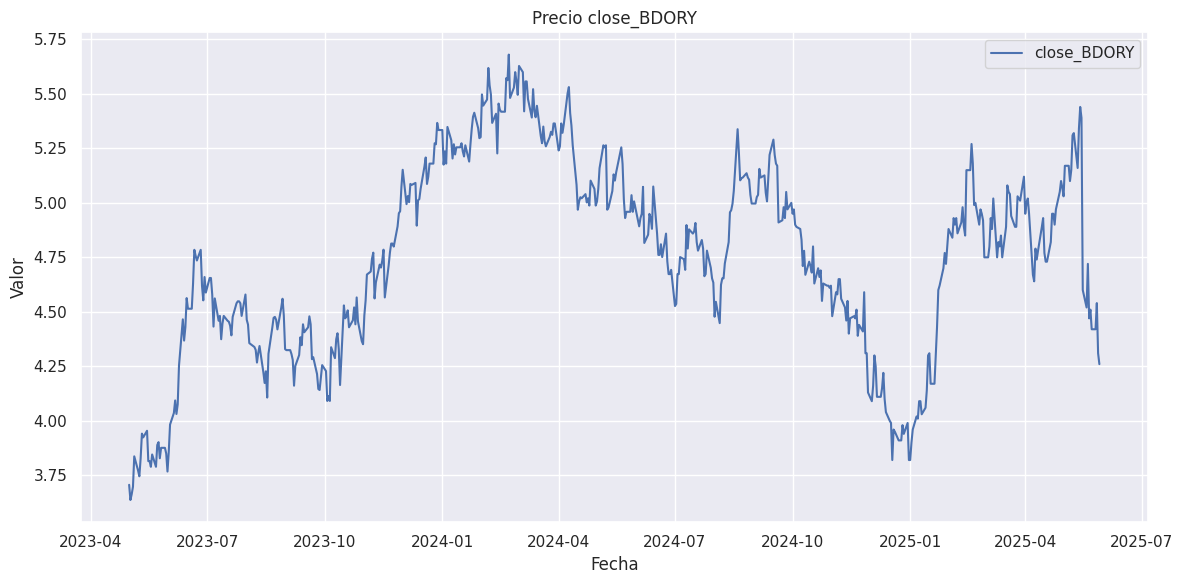

In [26]:
# Graficar las series originales de PBR y BOVESPA
plt.figure(figsize=(12, 6))
plt.plot(df_yfinance.index, df_yfinance[close_1], label=close_1)
plt.title(f"Precio {close_1}")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


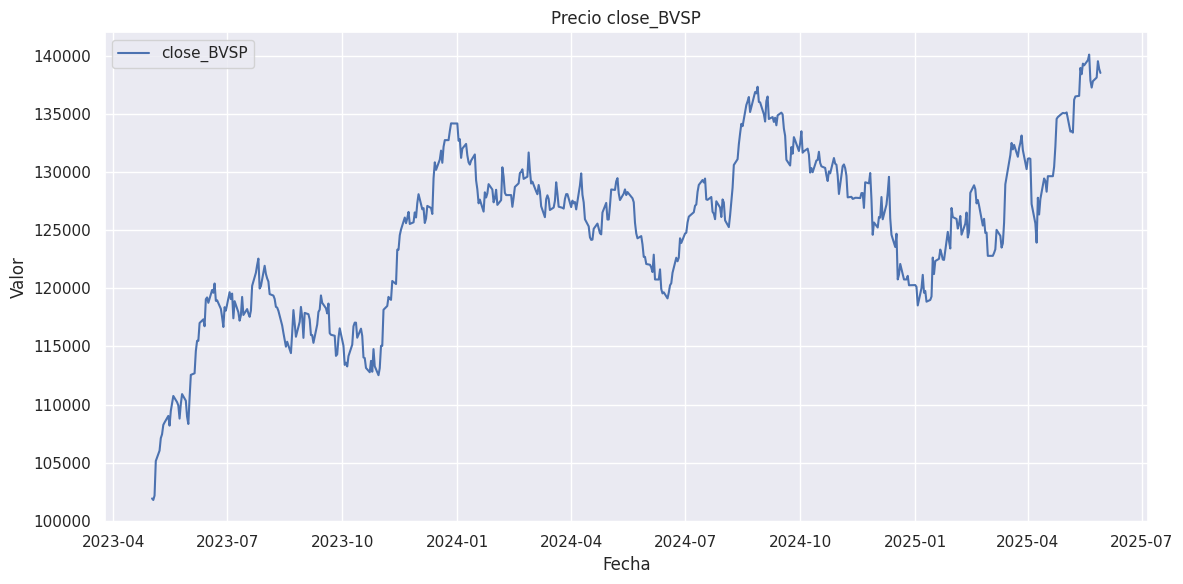

In [27]:
# Graficar las series originales de PBR y BOVESPA
plt.figure(figsize=(12, 6))
plt.plot(df_yfinance.index, df_yfinance[close_2], label=close_2)
plt.title(f"Precio {close_2}")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
df_yfinance.index = pd.to_datetime(df_yfinance.index).tz_localize(None)

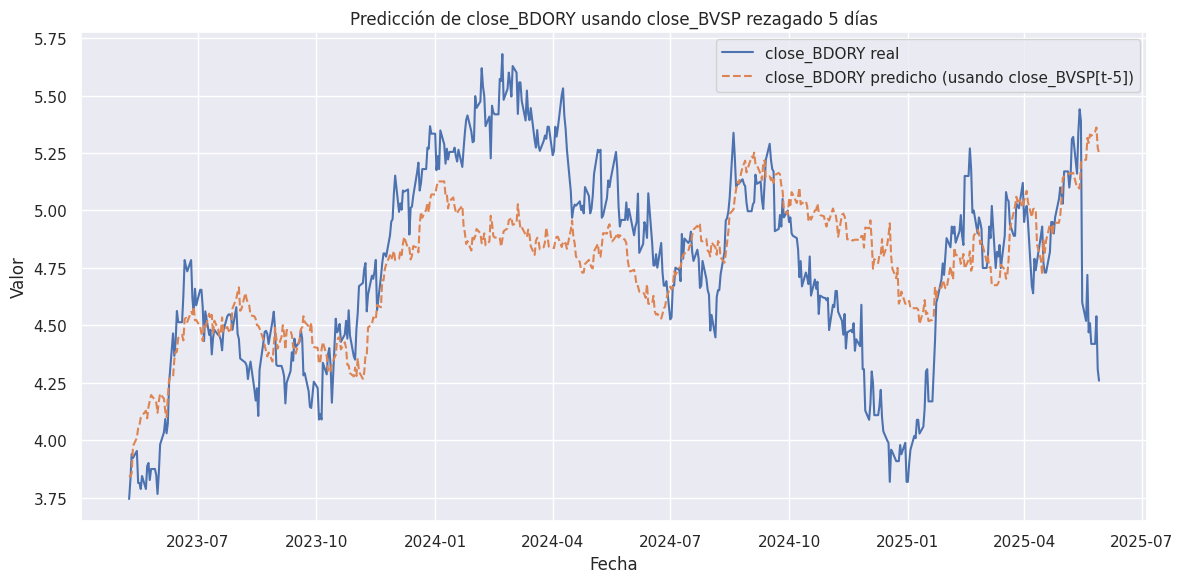

In [29]:
from sklearn.linear_model import LinearRegression

# Suponiendo que ya tenés df con columnas: close_1 y close_2
# Y que estas variables están definidas
lag = 5

# Crear variables X ( t-5) y y ( t)

# Crear copia del dataframe con la variable rezagada
df_modelo = df_yfinance.copy()
df_modelo[f'{close_2}_lag{lag}'] = df_modelo[close_2].shift(lag)

# Eliminar valores nulos (por el shift)
df_modelo = df_modelo[[close_1, f'{close_2}_lag{lag}']].dropna()

# Definir variables X e y
X = df_modelo[[f'{close_2}_lag{lag}']]
y = df_modelo[close_1]

# Ajustar modelo de regresión
modelo = LinearRegression()
modelo.fit(X, y)

# Generar predicciones
df_modelo['predicho'] = modelo.predict(X)

# Graficar
plt.figure(figsize=(12,6))
plt.plot(df_modelo.index, df_modelo[close_1], label=f'{close_1} real')
plt.plot(df_modelo.index, df_modelo['predicho'], label=f'{close_1} predicho (usando {close_2}[t-{lag}])', linestyle='--')
plt.title(f'Predicción de {close_1} usando {close_2} rezagado {lag} días')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,close_BDORY_real,close_BDORY_predicha
fecha,,
2023-05-30,3.849895,3.844675
2023-05-31,3.767242,3.859031
2023-06-01,3.858596,3.866426
2023-06-02,3.982637,3.855116
2023-06-05,4.035799,3.850331
...,...,...
2025-05-23,4.420000,5.312407
2025-05-26,4.420000,5.198000
2025-05-27,4.540000,5.005563


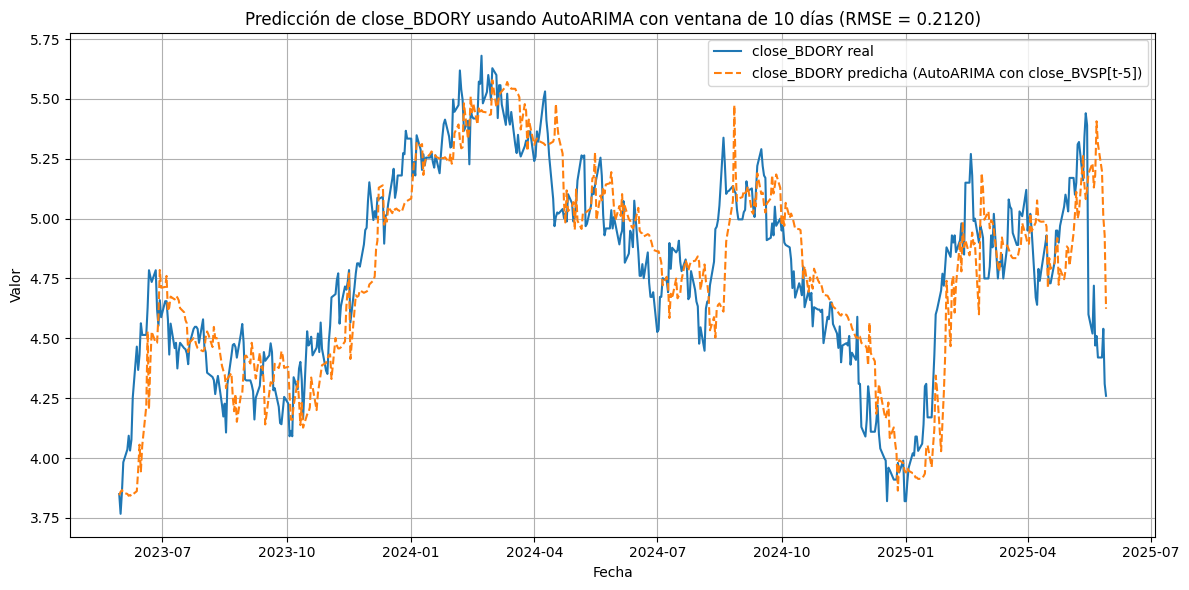

In [21]:
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Variables configurables
window_size = 10
lag = 5

# Crear copia para no modificar el original
df_model = df_yfinance.copy()

# Crear columna con el rezago de close_2
df_model[f'{close_2}_lag{lag}'] = df_model[close_2].shift(lag)

# Inicializar listas para resultados
predicciones = []
valores_reales = []
fechas = []

# Loop con ventana deslizante
for i in range(window_size + lag, len(df_model)):
    ventana = df_model.iloc[i - window_size - lag:i - lag]

    # Validación de NaN
    if ventana[f'{close_2}_lag{lag}'].isnull().any() or ventana[close_1].isnull().any():
        continue

    try:
        # Entrenar modelo ARIMA con variable exógena rezagada
        modelo = auto_arima(
            ventana[close_1],
            exogenous=ventana[[f'{close_2}_lag{lag}']],
            suppress_warnings=True,
            error_action='ignore'
        )

        # Predicción para el tiempo i
        exog_pred = df_model[[f'{close_2}_lag{lag}']].iloc[i:i+1]
        pred = modelo.predict(n_periods=1, exogenous=exog_pred)[0]

        # Guardar resultados
        predicciones.append(pred)
        valores_reales.append(df_model[close_1].iloc[i])
        fechas.append(df_model.index[i])

    except:
        continue

# Crear DataFrame de resultados
df_resultado = pd.DataFrame({
    'fecha': fechas,
    f'{close_1}_real': valores_reales,
    f'{close_1}_predicha': predicciones
}).set_index('fecha')

# Display the resulting DataFrame before calculating RMSE
display(df_resultado)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(df_resultado[f'{close_1}_real'], df_resultado[f'{close_1}_predicha']))

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df_resultado.index, df_resultado[f'{close_1}_real'], label=f'{close_1} real')
plt.plot(df_resultado.index, df_resultado[f'{close_1}_predicha'], label=f'{close_1} predicha (AutoARIMA con {close_2}[t-{lag}])', linestyle='--')
plt.title(f'Predicción de {close_1} usando AutoARIMA con ventana de {window_size} días (RMSE = {rmse:.4f})')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Librería AutoARIMA

In [24]:
%pip install pmdarima

In [22]:
from pmdarima.arima import auto_arima

# Yahoo finance

In [90]:
yfinance_auto_model = auto_arima(df_yfinance[close_1])

In [91]:
yfinance_auto_model

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [92]:
yfinance_auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  544
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 494.345
Date:                Mon, 16 Jun 2025   AIC                           -978.690
Time:                        18:20:58   BIC                           -957.205
Sample:                    05-01-2023   HQIC                          -970.289
                         - 05-29-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4068      0.145      9.729      0.000       1.123       1.690
ar.L2         -0.6643      0.116     -5.751      0.000      -0.891      -0.438
ma.L1         -1.5463      0.130    -11.872      0.000      -1.802      -1.291
ma.L2          0.7745      0.107      7.235      0.000       0.565       0.984
sigma2         0.0095      0.000     35.028      0.000       0.009       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              1433.80
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.71   Skew:                            -1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
yfinance_auto_results = yfinance_auto_model.fit(df_yfinance[close_1])

In [94]:
yfinance_auto_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  544
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 494.345
Date:                Mon, 16 Jun 2025   AIC                           -978.690
Time:                        18:21:03   BIC                           -957.205
Sample:                    05-01-2023   HQIC                          -970.289
                         - 05-29-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4068      0.145      9.729      0.000       1.123       1.690
ar.L2         -0.6643      0.116     -5.751      0.000      -0.891      -0.438
ma.L1         -1.5463      0.130    -11.872      0.000      -1.802      -1.291
ma.L2          0.7745      0.107      7.235      0.000       0.565       0.984
sigma2         0.0095      0.000     35.028      0.000       0.009       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              1433.80
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.71   Skew:                            -1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

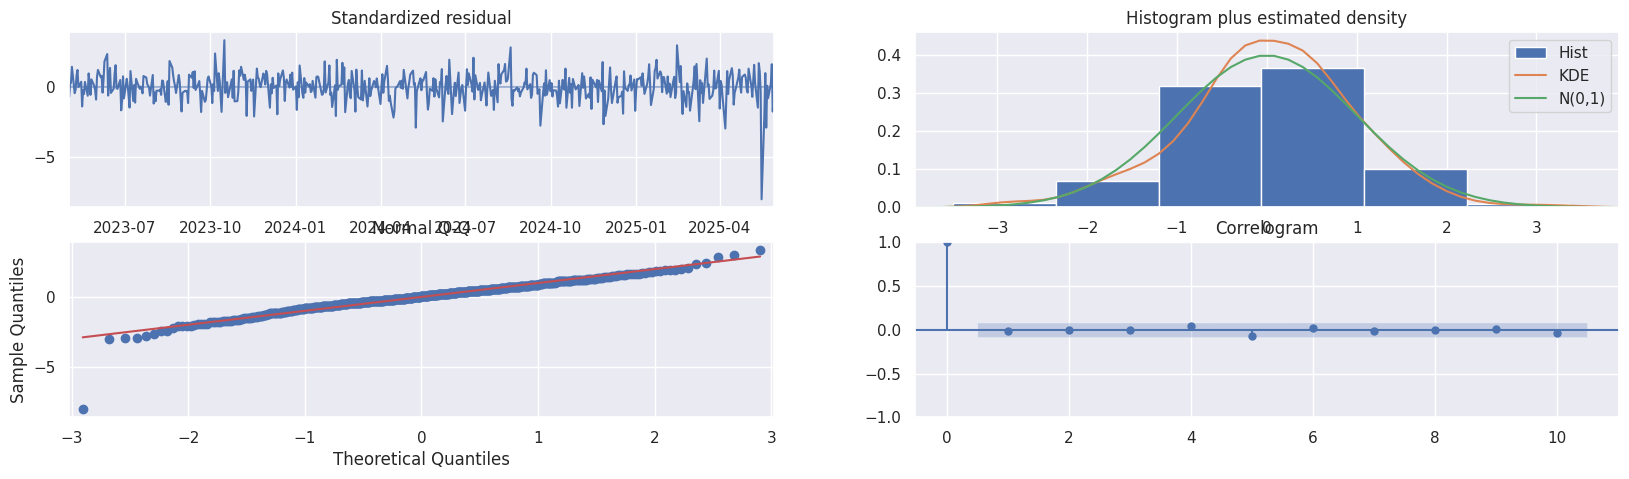

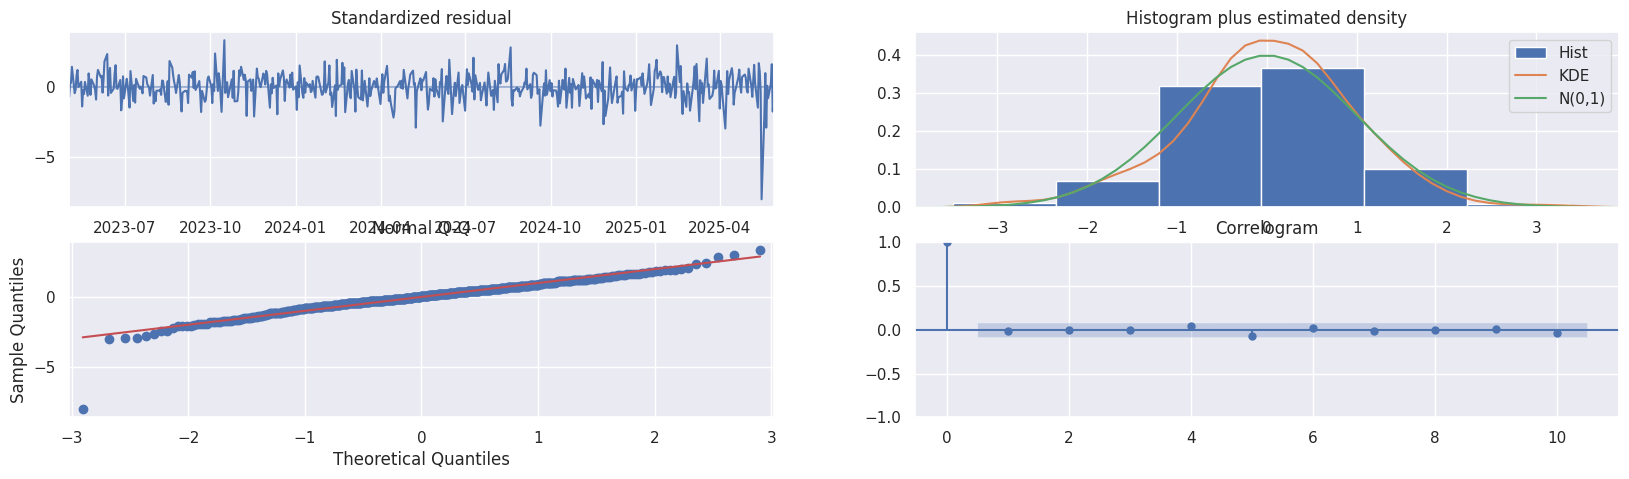

In [95]:
yfinance_auto_model.plot_diagnostics(figsize=(20,5))

In [96]:
df_yfinance['AutoModel'] =yfinance_auto_results.predict_in_sample(n_periods=len(df_yfinance))

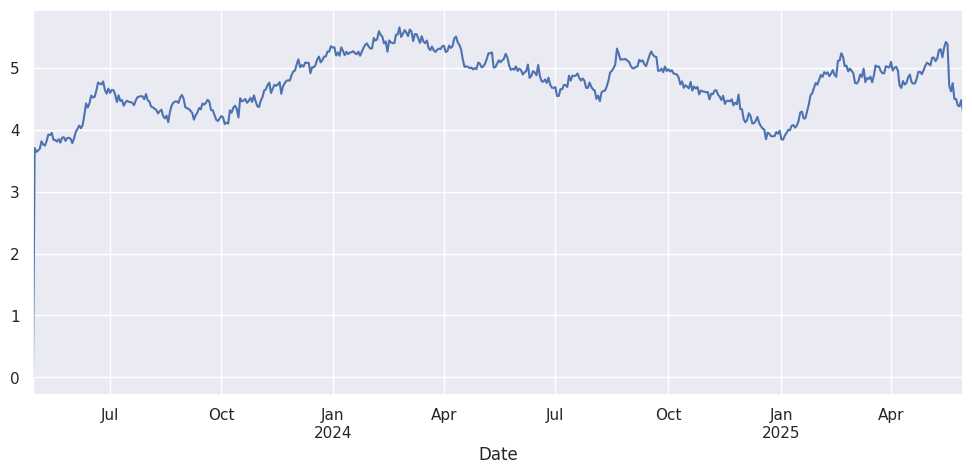

In [97]:
df_yfinance['AutoModel'].plot(figsize=(12,5));

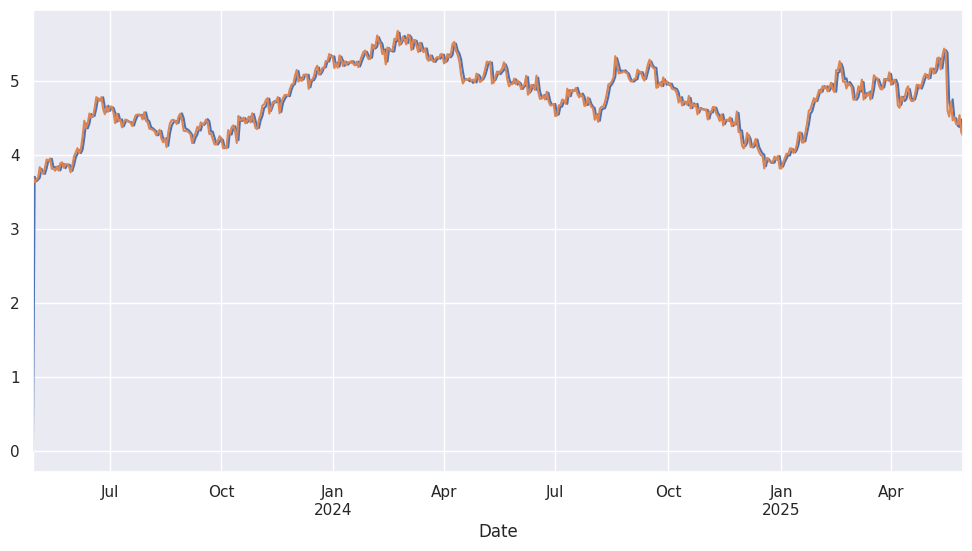

In [98]:
yfinance_auto_results.predict_in_sample(n_periods=len(df_yfinance)).plot()
df_yfinance[close_1].plot(figsize=(12,6));

In [99]:
len(df_yfinance)

544

In [100]:
yfinance_auto_results.predict_in_sample(n_periods=len(df_yfinance))

,predicted_mean
Date,
2023-05-01,0.000000
2023-05-02,3.706341
2023-05-03,3.644736
2023-05-04,3.665987
2023-05-05,3.694319
...,...
2025-05-23,4.497468
2025-05-26,4.394126
2025-05-27,4.379784


In [101]:
df_yfinance.tail()

,close_BDORY,close_BVSP,AutoModel
Date,,,
2025-05-23,4.42,137824.0,4.497468
2025-05-26,4.42,138136.0,4.394126
2025-05-27,4.54,139541.0,4.379784
2025-05-28,4.31,138888.0,4.481112
2025-05-29,4.26,138534.0,4.295385


#PREDICCION PROXIMOS 10 DIAS

In [104]:
# Predecir los próximos 10 días
forecast = yfinance_auto_results.predict(n_periods=10)

In [105]:
# Generar fechas futuras (si tu índice es de tipo fecha)
fechas_futuras = pd.date_range(
    start=df_yfinance.index[-1] + pd.Timedelta(days=1),
    periods=10,
    freq='B'
)

# Convertir a serie con índice de fechas
forecast_series = pd.Series(forecast, index=fechas_futuras)

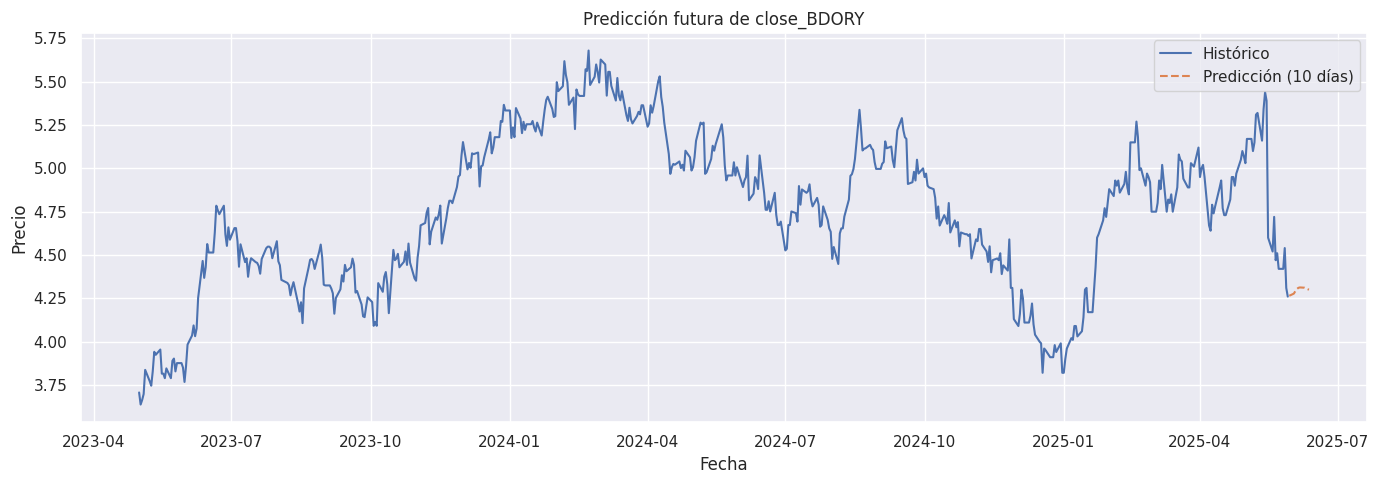

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(df_yfinance[close_1], label='Histórico')
plt.plot(forecast_series, label='Predicción (10 días)', linestyle='--')
plt.title(f'Predicción futura de {close_1}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [108]:
# Obtener los valores predichos y reales
valores_predichos = df_yfinance['AutoModel']
valores_reales = df_yfinance[close_1]

# Alinear las fechas (opcional: asegurar intersección si hay desalineación)
fechas_comunes = valores_reales.index.intersection(valores_predichos.index)

# Crear tabla de comparación
df_tabla = pd.DataFrame({
    f'{close_1}_real': valores_reales.loc[fechas_comunes],
    f'{close_1}_predicho': valores_predichos.loc[fechas_comunes]
}, index=fechas_comunes)

# Mostrar primeras filas como tabla simple
print(df_tabla.head(10))


            close_BDORY_real  close_BDORY_predicho
Date                                              
2023-05-01          3.706341              0.000000
2023-05-02          3.636737              3.706341
2023-05-03          3.662839              3.644736
2023-05-04          3.697639              3.665987
2023-05-05          3.836844              3.694319
2023-05-08          3.771593              3.814540
2023-05-09          3.745491              3.762675
2023-05-10          3.828145              3.745616
2023-05-11          3.941249              3.821408
2023-05-12          3.923848              3.923985


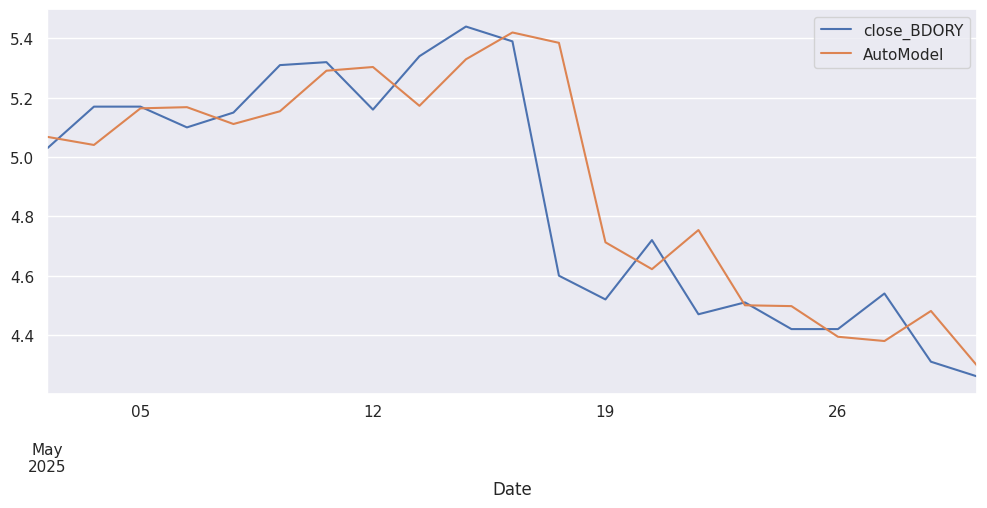

In [109]:
df_yfinance[[close_1,'AutoModel']]['2025-05-01':'2025-05-30'].plot(figsize=(12,5));

In [110]:
serie = df_yfinance[close_1]
split_point = int(len(serie) * 0.8)
train_data = serie[:split_point]
test_data = serie[split_point:]


In [111]:
len(test_data)

109

In [116]:
#from pmdarima.arima import auto_arima

history = list(train_data)
predictions = []

for t in range(len(test_data)):
    model = auto_arima(history, suppress_warnings=True, error_action='ignore')
    pred = model.predict(n_periods=1)[0]
    predictions.append(pred)
    history.append(test_data.iloc[t])  # expandimos ventana con valor real



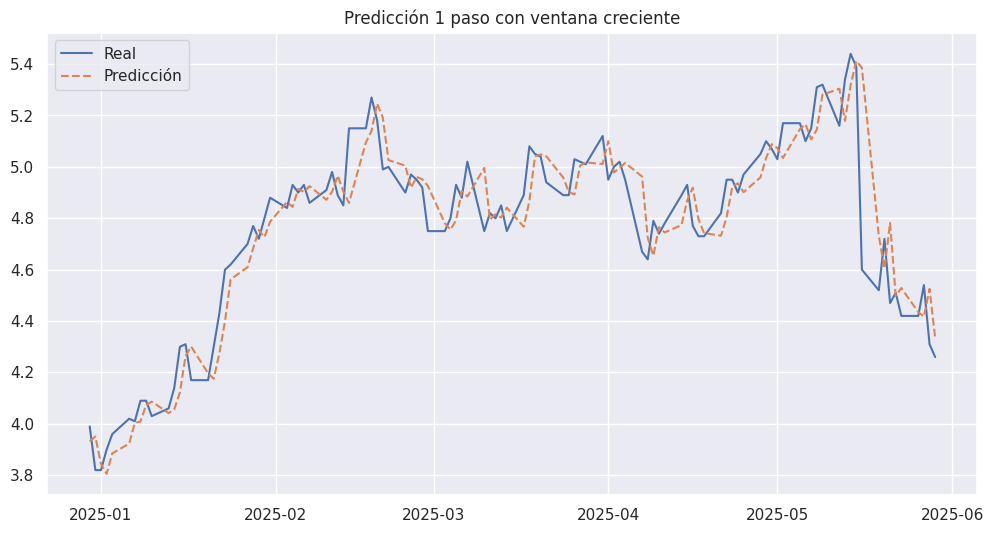

In [117]:
import matplotlib.pyplot as plt

# Crear serie de predicciones alineadas con test
test_index = test_data.index
pred_series = pd.Series(predictions, index=test_index)

# Gráfico comparativo
plt.figure(figsize=(12,6))
plt.plot(test_data, label='Real')
plt.plot(pred_series, label='Predicción', linestyle='--')
plt.legend()
plt.title('Predicción 1 paso con ventana creciente')
plt.show()


In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_data, pred_series)
mae = mean_absolute_error(test_data, pred_series)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

MSE: 0.0172
MAE: 0.0915


#MODELO LSTM

,close_BDORY_real,close_BDORY_predicha
fecha,,
2023-05-30,3.849895,3.844675
2023-05-31,3.767242,3.859031
2023-06-01,3.858596,3.866426
2023-06-02,3.982637,3.855116
2023-06-05,4.035799,3.850331
...,...,...
2025-05-23,4.420000,5.312407
2025-05-26,4.420000,5.198000
2025-05-27,4.540000,5.005563


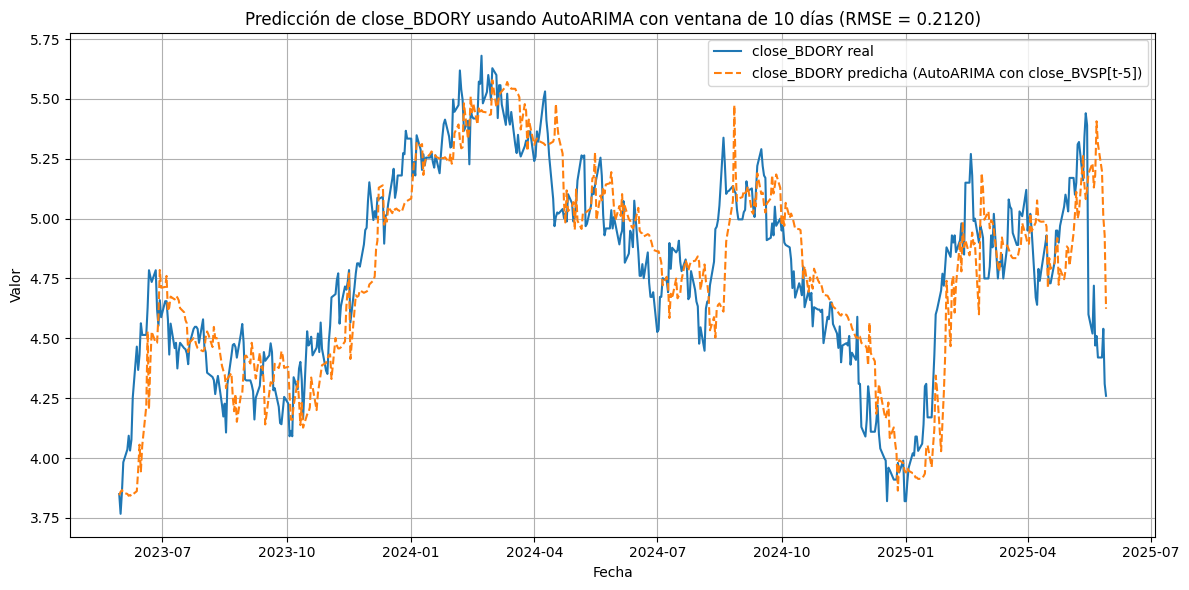

In [40]:
#from sklearn.metrics import mean_squared_error
#from pmdarima.arima import auto_arima
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd

# Variables configurables
window_size = 10
lag = 5

# Crear copia para no modificar el original
df_model = df_yfinance.copy()

# Crear columna con el rezago de close_2
df_model[f'{close_2}_lag{lag}'] = df_model[close_2].shift(lag)

# Inicializar listas para resultados
predicciones = []
valores_reales = []
fechas = []

# Loop con ventana deslizante
for i in range(window_size + lag, len(df_model)):
    ventana = df_model.iloc[i - window_size - lag:i - lag]

    # Validación de NaN
    if ventana[f'{close_2}_lag{lag}'].isnull().any() or ventana[close_1].isnull().any():
        continue

    try:
        # Entrenar modelo ARIMA con variable exógena rezagada
        modelo = auto_arima(
            ventana[close_1],
            exogenous=ventana[[f'{close_2}_lag{lag}']],
            suppress_warnings=True,
            error_action='ignore'
        )

        # Predicción para el tiempo i
        exog_pred = df_model[[f'{close_2}_lag{lag}']].iloc[i:i+1]
        pred = modelo.predict(n_periods=1, exogenous=exog_pred)[0]

        # Guardar resultados
        predicciones.append(pred)
        valores_reales.append(df_model[close_1].iloc[i])
        fechas.append(df_model.index[i])

    except:
        continue

# Crear DataFrame de resultados
df_resultado = pd.DataFrame({
    'fecha': fechas,
    f'{close_1}_real': valores_reales,
    f'{close_1}_predicha': predicciones
}).set_index('fecha')

# Display the resulting DataFrame before calculating RMSE
display(df_resultado)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(df_resultado[f'{close_1}_real'], df_resultado[f'{close_1}_predicha']))

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df_resultado.index, df_resultado[f'{close_1}_real'], label=f'{close_1} real')
plt.plot(df_resultado.index, df_resultado[f'{close_1}_predicha'], label=f'{close_1} predicha (AutoARIMA con {close_2}[t-{lag}])', linestyle='--')
plt.title(f'Predicción de {close_1} usando AutoARIMA con ventana de {window_size} días (RMSE = {rmse:.4f})')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
df_resultado.head()

,close_BDORY_real,close_BDORY_predicha
fecha,,
2023-05-30,3.849895,3.844675
2023-05-31,3.767242,3.859031
2023-06-01,3.858596,3.866426
2023-06-02,3.982637,3.855116
2023-06-05,4.035799,3.850331


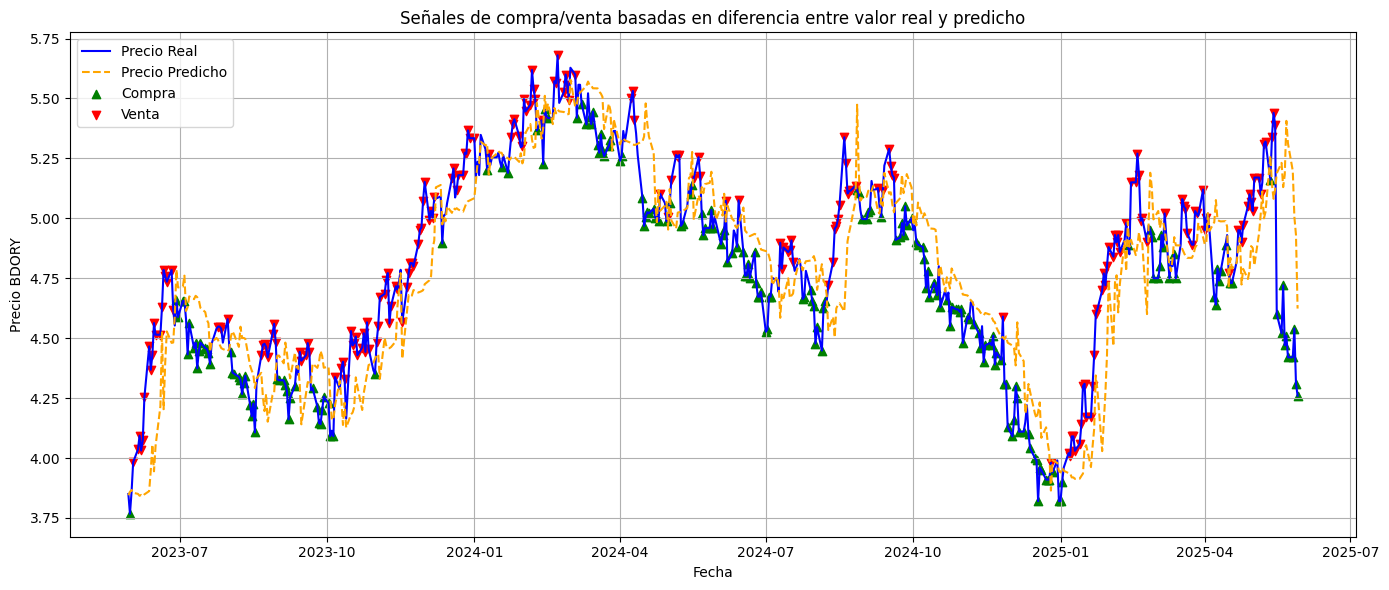

,close_BDORY_real,close_BDORY_predicha,diff,accion
fecha,,,,
2023-05-31,3.767242,3.859031,-0.091789,comprar
2023-06-02,3.982637,3.855116,0.127521,vender
2023-06-05,4.035799,3.850331,0.185468,vender
2023-06-06,4.093389,3.842500,0.250889,vender
2023-06-07,4.031368,3.845980,0.185388,vender
...,...,...,...,...
2025-05-23,4.420000,5.312407,-0.892407,comprar
2025-05-26,4.420000,5.198000,-0.778000,comprar
2025-05-27,4.540000,5.005563,-0.465563,comprar


In [42]:
df = df_resultado
# df.set_index("fecha", inplace=True) # Remove this line as 'fecha' is already the index

# Estrategia de señal de compra/venta basada en el cruce entre real y predicho
df["diff"] = df[f'{close_1}_real'] - df[f'{close_1}_predicha']
df["signal"] = 0
df.loc[df["diff"] < -0.05, "signal"] = 1   # Señal de compra: precio real muy por debajo del predicho
df.loc[df["diff"] > 0.05, "signal"] = -1   # Señal de venta: precio real muy por encima del predicho

# Crear columna de acción: compra, venta, mantener
df["accion"] = df["signal"].map({1: "comprar", -1: "vender", 0: "mantener"})

# Mostrar las primeras señales encontradas
df_signals = df[df["signal"] != 0][[f'{close_1}_real', f'{close_1}_predicha', "diff", "accion"]]

# Graficar con señales
plt.figure(figsize=(14, 6))
plt.plot(df.index, df[f'{close_1}_real'], label="Precio Real", color="blue")
plt.plot(df.index, df[f'{close_1}_predicha'], label="Precio Predicho", color="orange", linestyle="--")
plt.scatter(df[df["signal"] == 1].index, df[df["signal"] == 1][f'{close_1}_real'], label="Compra", marker="^", color="green")
plt.scatter(df[df["signal"] == -1].index, df[df["signal"] == -1][f'{close_1}_real'], label="Venta", marker="v", color="red")
plt.legend()
plt.title("Señales de compra/venta basadas en diferencia entre valor real y predicho")
plt.xlabel("Fecha")
plt.ylabel("Precio BDORY")
plt.grid(True)
plt.tight_layout()
plt.show()

#from IPython.display import display

display(df_signals)

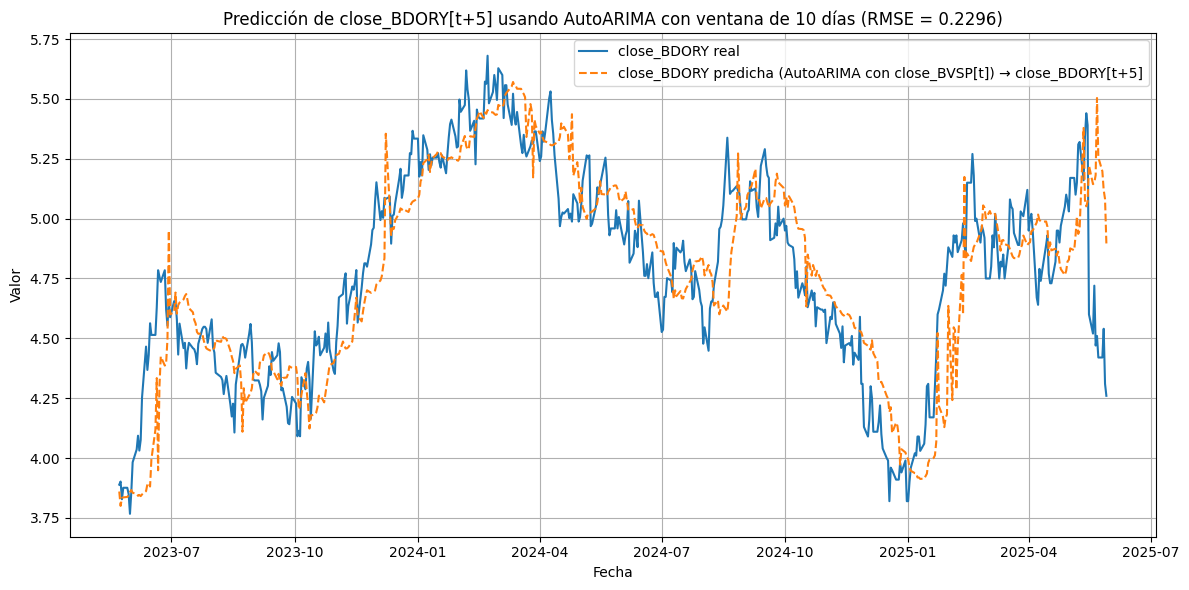

In [43]:
# Versión modificada del código: predice close_1[t+5] usando close_2[t]
#from pmdarima.arima import auto_arima
#from sklearn.metrics import mean_squared_error
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt

# Variables configurables
window_size = 10
forecast_horizon = 5  # predicción a t+5

# Crear copia para no modificar el original
df_model = df_yfinance.copy()

# Inicializar listas para resultados
predicciones = []
valores_reales = []
fechas = []

# Loop con ventana deslizante para predecir t+5 usando datos hasta t
for i in range(window_size, len(df_model) - forecast_horizon):
    ventana = df_model.iloc[i - window_size:i]

    # Extraer exógeno actual (t) para predecir t+5
    exog_pred = df_model[[close_2]].iloc[i:i+1].values

    # Validación de NaN
    if ventana[close_1].isnull().any() or ventana[close_2].isnull().any() or np.isnan(exog_pred).any():
        continue

    try:
        # Entrenar modelo ARIMA con variable exógena (hasta t)
        modelo = auto_arima(
            ventana[close_1],
            exogenous=ventana[[close_2]],
            suppress_warnings=True,
            error_action='ignore'
        )

        # Predecir para t+5 usando exógeno de t repetido forecast_horizon veces
        pred = modelo.predict(n_periods=forecast_horizon, exogenous=np.repeat(exog_pred, forecast_horizon, axis=0))[-1]

        # Guardar resultados
        predicciones.append(pred)
        valores_reales.append(df_model[close_1].iloc[i + forecast_horizon])
        fechas.append(df_model.index[i + forecast_horizon])

    except:
        continue

# Crear DataFrame de resultados
df_resultado = pd.DataFrame({
    'fecha': fechas,
    f'{close_1}_real': valores_reales,
    f'{close_1}_predicha': predicciones
}).set_index('fecha')

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(df_resultado[f'{close_1}_real'], df_resultado[f'{close_1}_predicha']))

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df_resultado.index, df_resultado[f'{close_1}_real'], label=f'{close_1} real')
plt.plot(df_resultado.index, df_resultado[f'{close_1}_predicha'], label=f'{close_1} predicha (AutoARIMA con {close_2}[t]) → {close_1}[t+{forecast_horizon}]', linestyle='--')
plt.title(f'Predicción de {close_1}[t+{forecast_horizon}] usando AutoARIMA con ventana de {window_size} días (RMSE = {rmse:.4f})')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


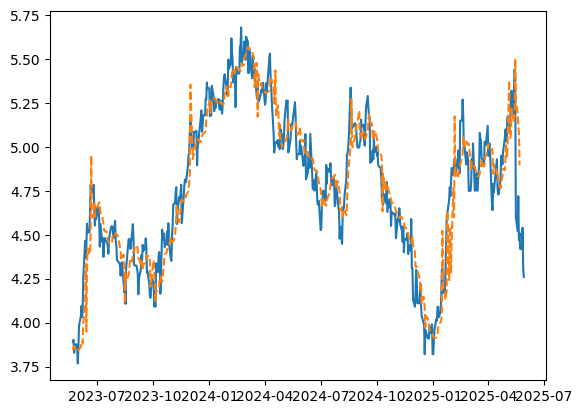

In [44]:
df_resultado[f'{close_1}_predicha_shifted'] = df_resultado[f'{close_1}_predicha'].shift(-5)
plt.plot(df_resultado.index, df_resultado[f'{close_1}_real'], label='Real')
plt.plot(df_resultado.index, df_resultado[f'{close_1}_predicha_shifted'], label='Predicha en t para t+5', linestyle='--')


In [45]:
import pandas as pd

# Calcular retornos diarios
close_1_ret = df_yfinance[close_1].pct_change().dropna()
close_2_ret = df_yfinance[close_2].pct_change().dropna()

# Empalmar retornos alineados
df_retornos = pd.concat([close_1_ret, close_2_ret], axis=1).dropna()
df_retornos.columns = [close_1, close_2]

# Calcular correlación cruzada con lags de -5 a +5
lags = range(-5, 6)
correlaciones = []

for lag in lags:
    if lag < 0:
        corr = df_retornos[close_1].corr(df_retornos[close_2].shift(-lag))
    else:
        corr = df_retornos[close_1].shift(lag).corr(df_retornos[close_2])
    correlaciones.append(round(corr, 4))

# Crear DataFrame con resultados
correlacion_df = pd.DataFrame({
    'lag': lags,
    f'Corr({close_1}, {close_2})': correlaciones
})

# Mostrar tabla
display(correlacion_df)


,lag,"Corr(close_BDORY, close_BVSP)"
0,-5,-0.0700
1,-4,0.0239
2,-3,-0.0367
3,-2,0.0104
4,-1,0.0309
5,0,0.4671
6,1,-0.0182
7,2,-0.0320
8,3,0.0713
9,4,0.0010


Para cada lag en [-5, +5]:

Compara el retorno de close_1 con el retorno de close_2 desplazado.

Si lag > 0: close_1 se compara con el pasado de close_2.

Si lag < 0: close_1 se compara con el futuro de close_2.

Lag positivo: close_2 podría causar o preceder a close_1.

Lag negativo: close_1 podría liderar a close_2.

El lag con mayor correlación absoluta puede sugerir liderazgo temporal.

Epoch 1/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.1532
Epoch 2/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0130
Epoch 3/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126
Epoch 4/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0144
Epoch 5/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0139
Epoch 6/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132
Epoch 7/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0131
Epoch 8/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0118
Epoch 9/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125
Epoch 10/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128
Epoch 11/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104
Epoch 12/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123
Epoch 13/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117
Epoch 14/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0098
Epoch 15/25
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112
Epoch 16/25
67/67 ━

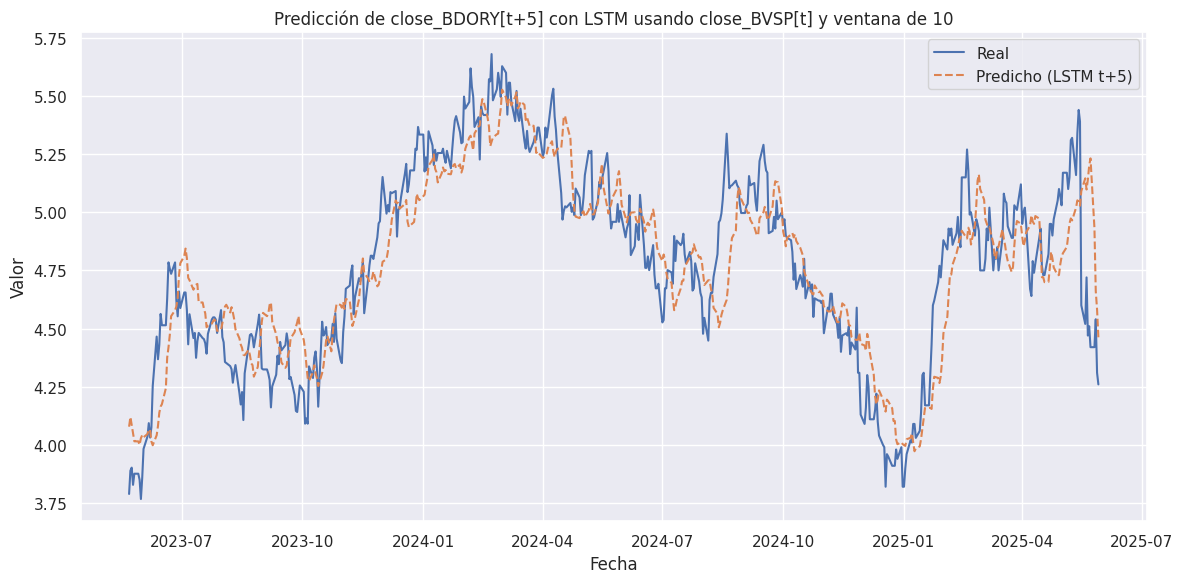

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Concatenate, Input
from tensorflow.keras.models import Model

# Parámetros configurables
window_size = 10
forecast_horizon = 5


# Preprocesamiento
df = df_yfinance

# Escalado
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=[close_1, close_2], index=df.index)

# Preparar secuencias para LSTM
X_seq, X_exog, y, fechas = [], [], [], []

for i in range(window_size, len(scaled_df) - forecast_horizon):
    X_seq.append(scaled_df[close_1].iloc[i - window_size:i].values.reshape(-1, 1))  # ventana histórica de close_1
    X_exog.append(scaled_df[close_2].iloc[i])  # valor actual de close_2
    y.append(scaled_df[close_1].iloc[i + forecast_horizon])  # valor futuro de close_1
    fechas.append(df.index[i + forecast_horizon])

X_seq = np.array(X_seq)  # (n_samples, window_size, 1)
X_exog = np.array(X_exog).reshape(-1, 1)  # (n_samples, 1)
y = np.array(y).reshape(-1, 1)

# Modelo LSTM con input dual: secuencia + exógeno
input_seq = Input(shape=(window_size, 1))
input_exog = Input(shape=(1,))
x = LSTM(50)(input_seq)
x = Concatenate()([x, input_exog])
output = Dense(1)(x)
model = Model(inputs=[input_seq, input_exog], outputs=output)

model.compile(optimizer='adam', loss='mse')
model.fit([X_seq, X_exog], y, epochs=25, batch_size=8, verbose=1)

# Predicción
y_pred_scaled = model.predict([X_seq, X_exog])
# Reescalamos
y_pred = scaler.inverse_transform(np.hstack((y_pred_scaled, np.zeros_like(y_pred_scaled))))[:, 0]
y_true = scaler.inverse_transform(np.hstack((y, np.zeros_like(y))))[:, 0]

# Resultados
df_resultado = pd.DataFrame({
    'fecha': fechas,
    f'{close_1}_real': y_true,
    f'{close_1}_predicha': y_pred
}).set_index('fecha')

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'RMSE: {rmse:.4f}')

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df_resultado.index, df_resultado[f'{close_1}_real'], label='Real')
plt.plot(df_resultado.index, df_resultado[f'{close_1}_predicha'], label='Predicho (LSTM t+5)', linestyle='--')
plt.title(f'Predicción de {close_1}[t+5] con LSTM usando {close_2}[t] y ventana de {window_size}')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip uninstall numpy scipy scikit-learn tensorflow -y
!pip install numpy scipy scikit-learn tensorflow

In [22]:
# Instalación de dependencias (si no están)
#!pip install -q pandas matplotlib scikit-learn tensorflow

# --- Librerías ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


In [23]:
# Eliminar filas con NaN
df_yfinance = df_yfinance.dropna()

In [24]:

# Normalización
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_yfinance)

# Configuraciones
forecast_horizon = 5
ventanas = [10, 20, 30, 60, 90, 120]
resultados = []

# Evaluación de cada tamaño de ventana
for n_input in ventanas:
    X, y = [], []
    for i in range(n_input, len(scaled_data) - forecast_horizon):
        X.append(scaled_data[i - n_input:i])
        y.append(scaled_data[i + forecast_horizon][0])  # predecir close_1[t+5]

    X, y = np.array(X), np.array(y)
    if len(X) == 0:
        continue

    # División en entrenamiento y prueba
    train_size = int(len(X) * 0.9)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Modelo LSTM
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_input, 2)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Entrenamiento
    model.fit(X_train, y_train, epochs=10, verbose=0)

    # Evaluación
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler.inverse_transform(np.hstack([y_pred_scaled, np.zeros((len(y_pred_scaled), 1))]))[:, 0]
    y_true = scaler.inverse_transform(np.hstack([y_test.reshape(-1, 1), np.zeros((len(y_test), 1))]))[:, 0]

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    resultados.append((n_input, rmse))

# Mostrar resultados
resultados_df = pd.DataFrame(resultados, columns=["Ventana", "RMSE"])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step


In [25]:
resultados_df.tail()

,Ventana,RMSE
1,20,0.351678
2,30,0.355888
3,60,0.351096
4,90,0.378636
5,120,0.405943


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.2527 - val_loss: 0.0293
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0214 - val_loss: 0.0195
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0141 - val_loss: 0.0312
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0097 - val_loss: 0.0241
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0074 - val_loss: 0.0295
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0066 - val_loss: 0.0179
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0050 - val_loss: 0.0155
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0046 - val_loss: 0.0130
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0041 - val_loss: 0.0189
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0042 - val_loss: 0.0127
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0036 - val_loss: 0.0118
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0

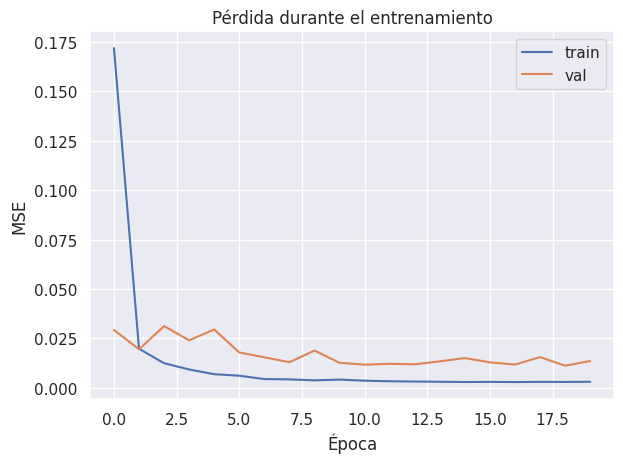

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


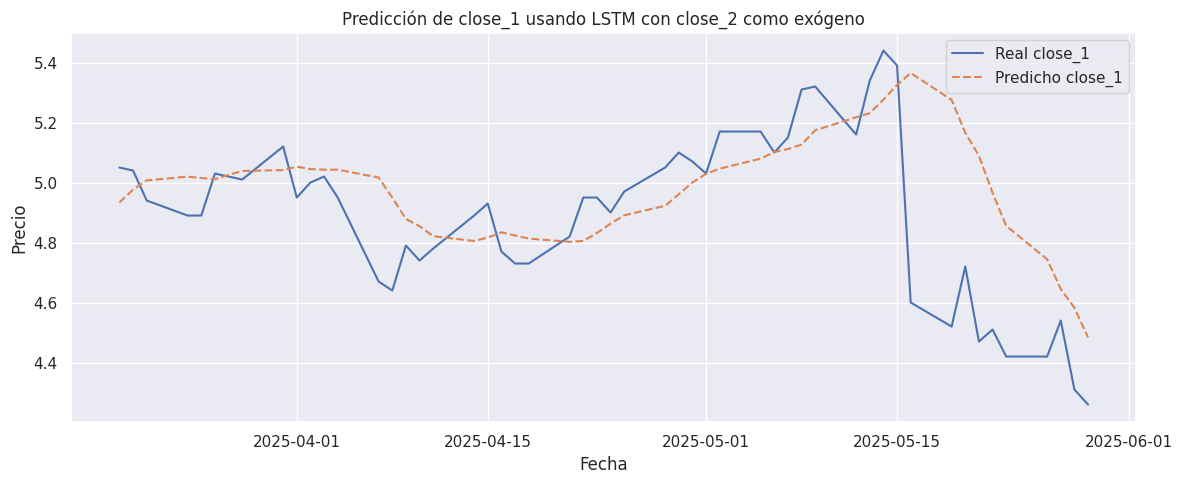

In [26]:

# Eliminar filas con NaN
df_yfinance = df_yfinance.dropna()


# --- Escalamiento ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_yfinance)

# --- Parámetros ---
n_input = 30
n_features = 2

# --- Generar secuencias para entrenamiento ---
X, y = [], []
for i in range(n_input, len(scaled_data)):
    X.append(scaled_data[i - n_input:i])
    y.append(scaled_data[i][0])  # solo close_1 como target

X, y = np.array(X), np.array(y)

# --- División en entrenamiento y test ---
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# --- Modelo LSTM multivariado ---
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# --- Entrenamiento ---
history = model.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_test, y_test))

# --- Graficar pérdida ---
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Pérdida durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Predicciones ---
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(np.hstack([y_pred_scaled, np.zeros((len(y_pred_scaled), 1))]))[:, 0]
y_true = scaler.inverse_transform(np.hstack([y_test.reshape(-1, 1), np.zeros((len(y_test), 1))]))[:, 0]

# --- Visualización final ---
plt.figure(figsize=(12, 5))
plt.plot(df_yfinance.index[-len(y_test):], y_true, label='Real close_1')
plt.plot(df_yfinance.index[-len(y_test):], y_pred, label='Predicho close_1', linestyle='--')
plt.title("Predicción de close_1 usando LSTM con close_2 como exógeno")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [122]:
df_yfinance

,close_BDORY,close_BVSP,AutoModel
Date,,,
2023-05-01,3.706341,NaN,0.000000
2023-05-02,3.636737,101927.0,3.706341
2023-05-03,3.662839,101797.0,3.644736
2023-05-04,3.697639,102174.0,3.665987
2023-05-05,3.836844,105148.0,3.694319
...,...,...,...
2025-05-23,4.420000,137824.0,4.497468
2025-05-26,4.420000,138136.0,4.394126
2025-05-27,4.540000,139541.0,4.379784


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━

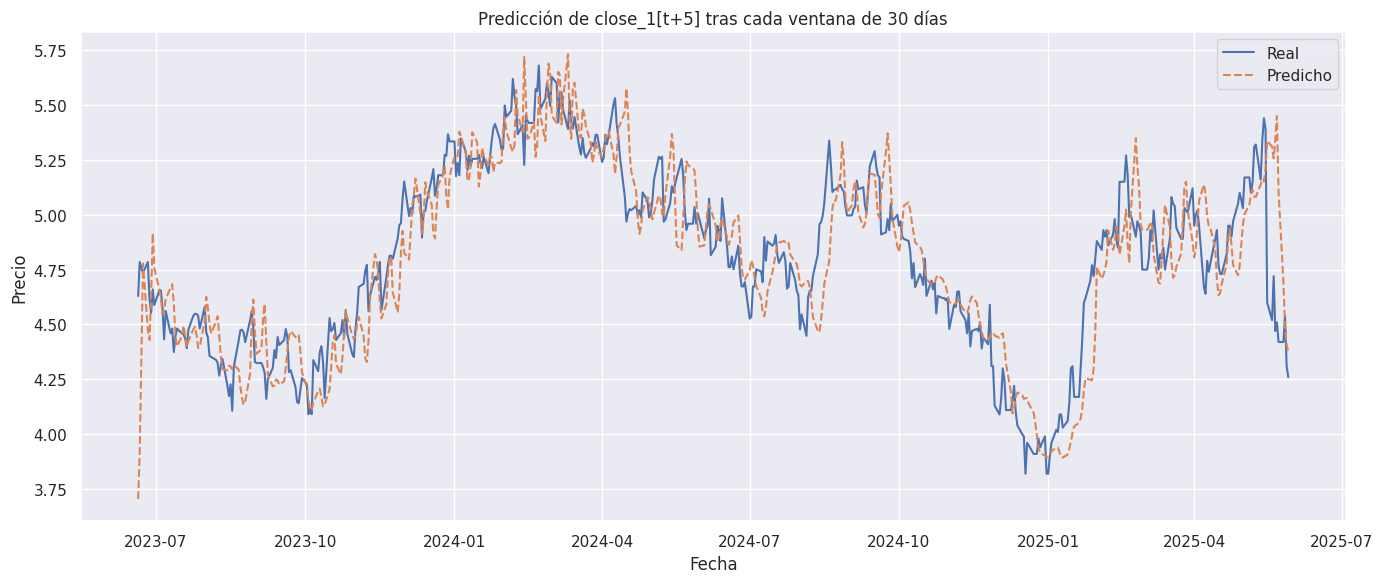

,real,predicho
fecha,,
2025-05-16,4.60,5.337184
2025-05-19,4.52,5.309662
2025-05-20,4.72,5.256866
2025-05-21,4.47,5.344974
2025-05-22,4.51,5.449669
2025-05-23,4.42,5.105208
2025-05-26,4.42,4.692978
2025-05-27,4.54,4.489198
2025-05-28,4.31,4.407610


from matplotlib import pyplot as plt
_df_0['real'].plot(kind='hist', bins=20, title='real')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['predicho'].plot(kind='hist', bins=20, title='predicho')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='real', y='predicho', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['real'].plot(kind='line', figsize=(8, 4), title='real')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['predicho'].plot(kind='line', figsize=(8, 4), title='predicho')
plt.gca().spines[['top', 'right']].set_visible(False)

In [24]:
# Reimportar librerías tras el reinicio del entorno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



# Eliminar NaN
df_yfinance = df_yfinance.dropna()

# Escalamiento
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_yfinance)

# Parámetros
n_input = 30
n_pred = 5
n_features = 2

# Modelo LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Predicción cada 30 días
predicciones = []
valores_reales = []
fechas_pred = []

for i in range(n_input, len(scaled_data) - n_pred):
    X_window = scaled_data[i - n_input:i].reshape(1, n_input, n_features)
    y_real = scaled_data[i + n_pred][0]

    # Entrenar temporalmente el modelo con la muestra actual (simulando rolling)
    model.fit(X_window, np.array([scaled_data[i][0]]), epochs=5, verbose=0)

    y_pred = model.predict(X_window)[0][0]
    y_pred_inv = scaler.inverse_transform([[y_pred, 0]])[0][0]
    y_real_inv = scaler.inverse_transform([[y_real, 0]])[0][0]

    predicciones.append(y_pred_inv)
    valores_reales.append(y_real_inv)
    fechas_pred.append(df_yfinance.index[i + n_pred])

# DataFrame de resultados
df_pred = pd.DataFrame({
    'fecha': fechas_pred,
    'real': valores_reales,
    'predicho': predicciones
}).set_index('fecha')

# Gráfico
plt.figure(figsize=(14, 6))
plt.plot(df_pred.index, df_pred['real'], label='Real')
plt.plot(df_pred.index, df_pred['predicho'], label='Predicho', linestyle='--')
plt.title("Predicción de close_1[t+5] tras cada ventana de 30 días")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar el DataFrame de predicciones usando pandas
df_pred.tail(10)